# Ceng 796 Term Project

## Paper: Adaptive Weighted Discriminator for Training Generative Adversarial Networks, CVPR 2021

### Paper Authors: Vasily Zadorozhnyy, Qiang Cheng, Qiang Ye

### Code Author: Orhun Buğra Baran

### Summary of Paper:

The paper suggests using adaptive loss for components of GAN discriminator to avoid making updates that reduces the effect of either loss due to having conflicting gradient update directions. The authors propose to make gradient updates that either encourages to both real and fake loss of discriminator to increase or keep one of them same and improve the other.

The classical GAN objective is as follows:

$L_D = L_r + L_f$ where 

$L_r = \mathbb{E}_{x \sim pd}[logD(x)]$, $L_f = \mathbb{E}_{z \sim pz}[log(1 - D(G(z)))]$

The authors claim that although increasing (training with gradient ascent, same as taking negative of $L_D$ and training with gradient descent) $\nabla L_D$ may mean reducing $L_r$ or $L_f$  by going in the opposite direction of $\nabla L_r$ or $\nabla L_f$ and eventually destabilize the training.

Therefore, the paper proposes using an adaptive weighted loss function for discriminator loss function as follows:

$$L_D^{aw} = w_r*L_r + w_f*L_f$$

The overall algorithm for updating discriminator can be seen below:

![Algorithm 1 of paper](alg1.png "Algorithm 1")

Algorithm 1 has a nice proof in Appendix A of the paper.

### Implementation Overview

    - Firstly the models are created. These are standard ResNet based SNGAN Generator and Discriminator. The architecture can be seen below. The code can be found in models.py.
    
![SNGAN Generator and Discriminator](SNGAN.png "SNGAN")

    - Train train_sngan.py and train_sngan_aw.py contains codes for training and FID calculation. train_sngan_aw.py is adapted for adaptive weight calculation and mostly the same as train_sngan.py.
    
    - calculate_aw.py implements a function that calculates the gradients for discriminator based on Algorithm 1 and inside of train_sngan_aw.py optimization step is performed.
    
    - In eval.py FID is calculated. It is used in training to determine the best model and accordingly best model is saved.
    
### Hyperparameters of Model

    -batch size: batch size of data loader typically 32 or 64 
    -learning rate: shared learning rate of discriminator and generator
    -cuda: a boolean that denotes whether cuda is available
    -num_epochs: number of epochs to run 
    -num_disc_updates: number of discriminator updates per generator updates
    
### Training and Saving the Model

Below you can see best runs on the notebook that I have obtained for both SNGAN and SNGAN-AW. Each model trained for 31 epochs and after 5 epochs FID is calculated. Based on best FID value models (generator and discriminator) are saved.

Plase note that the code inside train_sngan.py and train_sngan_aw.py contains a torch function that automatically downloads the CIFAR-10 dataset if it is not already downloaded.

### Loading Pretrained Model

After training you can go into eval.py and use calculate_fid function for whichever model you want by providing the appropriate generator checkpoint path. This will give the FID result. On top of that you can already see FID results and generated images by both SNGAN and SNGAN-AW on CIFAR-10.

### Reproduced Results

 <table>
  <tr>
    <th>Method</th>
    <th>Result (FID Lower better)</th>
  </tr>
  <tr>
    <td>SNGAN</td>
    <td>21.7</td>
  </tr>
  <tr>
    <td>SNGAN-AW</td>
    <td>12.32</td>
  </tr>
    <tr>
    <td>SNGAN(reproduced)</td>
    <td>42.37</td>
  </tr>
    <tr>
    <td>SNGAN-AW(reproduced)</td>
    <td>37.39</td>
  </tr>
</table> 

This results reflect the FID results from Table 1 of the paper on CIFAR-10 with reproduced results. 
Additionally you can see obtained images by each generator below. I obtained these results after 80 epochs papers reported results obtained after 320 epochs.

### Reproduction Challenges

The paper overall was well written and did not leave much holes in terms of implementation details. However, since the approach requires some manipulation of gradients obtaining correct gradients with a fast implementation was a challenge. In early phases code was running incredibly slowly which hampered the overall progress. 

In [4]:
from train_sngan import *

g, d = train_sngan(batch_size=64, lr=0.0002, cuda=True, num_epoch=81, num_disc_updates=3)

Files already downloaded and verified


Using cache found in /home/bugra/.cache/torch/hub/pytorch_vision_v0.8.0


Epoch 0 Iter 0 Loss disc 1.99 Loss gen -0.30
Epoch 0 Iter 50 Loss disc 1.88 Loss gen 0.33
Epoch 0 Iter 100 Loss disc 1.90 Loss gen 0.82
Epoch 0 Iter 150 Loss disc 1.33 Loss gen 0.61
Epoch 0 Iter 200 Loss disc 1.77 Loss gen -0.18
Epoch 0 Iter 250 Loss disc 2.07 Loss gen 0.54
Epoch 0 Iter 300 Loss disc 1.20 Loss gen 1.39
Epoch 0 Iter 350 Loss disc 1.46 Loss gen 1.00
Epoch 0 Iter 400 Loss disc 2.06 Loss gen 0.39
Epoch 0 Iter 450 Loss disc 1.62 Loss gen 0.39
Epoch 0 Iter 500 Loss disc 1.49 Loss gen 0.25
Epoch 0 Iter 550 Loss disc 1.62 Loss gen 0.85
Epoch 0 Iter 600 Loss disc 0.79 Loss gen 0.99
Epoch 0 Iter 650 Loss disc 1.91 Loss gen 0.17
Epoch 0 Iter 700 Loss disc 1.63 Loss gen 0.96
Epoch 0 Iter 750 Loss disc 1.44 Loss gen 0.68
Epoch 0 FID 286.12
Epoch 1 Iter 0 Loss disc 1.67 Loss gen 0.72
Epoch 1 Iter 50 Loss disc 1.92 Loss gen 1.43
Epoch 1 Iter 100 Loss disc 1.70 Loss gen -0.37
Epoch 1 Iter 150 Loss disc 1.99 Loss gen 0.19
Epoch 1 Iter 200 Loss disc 1.42 Loss gen 0.97
Epoch 1 Iter 250 L

Epoch 11 Iter 50 Loss disc 1.48 Loss gen 0.47
Epoch 11 Iter 100 Loss disc 1.66 Loss gen 0.48
Epoch 11 Iter 150 Loss disc 1.78 Loss gen 0.65
Epoch 11 Iter 200 Loss disc 1.80 Loss gen 0.66
Epoch 11 Iter 250 Loss disc 1.50 Loss gen 0.98
Epoch 11 Iter 300 Loss disc 1.72 Loss gen 0.41
Epoch 11 Iter 350 Loss disc 1.59 Loss gen 0.73
Epoch 11 Iter 400 Loss disc 1.55 Loss gen -0.06
Epoch 11 Iter 450 Loss disc 1.60 Loss gen 0.42
Epoch 11 Iter 500 Loss disc 1.73 Loss gen 0.74
Epoch 11 Iter 550 Loss disc 1.77 Loss gen 0.23
Epoch 11 Iter 600 Loss disc 1.88 Loss gen 0.65
Epoch 11 Iter 650 Loss disc 1.67 Loss gen -0.38
Epoch 11 Iter 700 Loss disc 1.57 Loss gen 0.42
Epoch 11 Iter 750 Loss disc 1.62 Loss gen 0.51
Epoch 12 Iter 0 Loss disc 1.94 Loss gen 0.41
Epoch 12 Iter 50 Loss disc 1.74 Loss gen 0.76
Epoch 12 Iter 100 Loss disc 2.29 Loss gen -0.29
Epoch 12 Iter 150 Loss disc 1.65 Loss gen 0.37
Epoch 12 Iter 200 Loss disc 1.56 Loss gen 0.12
Epoch 12 Iter 250 Loss disc 1.82 Loss gen 0.48
Epoch 12 Iter 

Epoch 21 Iter 750 Loss disc 1.61 Loss gen -0.03
Epoch 22 Iter 0 Loss disc 1.90 Loss gen 0.24
Epoch 22 Iter 50 Loss disc 1.68 Loss gen 0.52
Epoch 22 Iter 100 Loss disc 2.18 Loss gen -0.26
Epoch 22 Iter 150 Loss disc 2.00 Loss gen 0.38
Epoch 22 Iter 200 Loss disc 1.61 Loss gen 0.41
Epoch 22 Iter 250 Loss disc 1.91 Loss gen 0.14
Epoch 22 Iter 300 Loss disc 1.57 Loss gen 0.31
Epoch 22 Iter 350 Loss disc 1.92 Loss gen 0.63
Epoch 22 Iter 400 Loss disc 1.75 Loss gen 0.16
Epoch 22 Iter 450 Loss disc 1.64 Loss gen 0.36
Epoch 22 Iter 500 Loss disc 1.79 Loss gen 0.47
Epoch 22 Iter 550 Loss disc 1.80 Loss gen 0.16
Epoch 22 Iter 600 Loss disc 1.37 Loss gen 0.30
Epoch 22 Iter 650 Loss disc 1.92 Loss gen 0.60
Epoch 22 Iter 700 Loss disc 1.96 Loss gen 0.58
Epoch 22 Iter 750 Loss disc 1.96 Loss gen 0.32
Epoch 23 Iter 0 Loss disc 2.03 Loss gen 0.28
Epoch 23 Iter 50 Loss disc 1.95 Loss gen 0.05
Epoch 23 Iter 100 Loss disc 1.83 Loss gen 0.62
Epoch 23 Iter 150 Loss disc 1.61 Loss gen 0.26
Epoch 23 Iter 200

Epoch 32 Iter 650 Loss disc 1.99 Loss gen 0.48
Epoch 32 Iter 700 Loss disc 1.87 Loss gen 0.48
Epoch 32 Iter 750 Loss disc 1.56 Loss gen 0.49
Epoch 33 Iter 0 Loss disc 1.77 Loss gen -0.18
Epoch 33 Iter 50 Loss disc 1.89 Loss gen -0.09
Epoch 33 Iter 100 Loss disc 1.84 Loss gen 0.04
Epoch 33 Iter 150 Loss disc 1.99 Loss gen -0.28
Epoch 33 Iter 200 Loss disc 2.11 Loss gen 0.00
Epoch 33 Iter 250 Loss disc 2.16 Loss gen 0.60
Epoch 33 Iter 300 Loss disc 1.96 Loss gen -0.15
Epoch 33 Iter 350 Loss disc 1.89 Loss gen 0.41
Epoch 33 Iter 400 Loss disc 1.94 Loss gen 0.23
Epoch 33 Iter 450 Loss disc 1.96 Loss gen -0.54
Epoch 33 Iter 500 Loss disc 1.85 Loss gen 0.30
Epoch 33 Iter 550 Loss disc 1.91 Loss gen 0.05
Epoch 33 Iter 600 Loss disc 1.78 Loss gen -0.18
Epoch 33 Iter 650 Loss disc 1.86 Loss gen 0.45
Epoch 33 Iter 700 Loss disc 2.13 Loss gen -0.45
Epoch 33 Iter 750 Loss disc 1.82 Loss gen 0.08
Epoch 34 Iter 0 Loss disc 1.64 Loss gen 0.24
Epoch 34 Iter 50 Loss disc 1.69 Loss gen 0.43
Epoch 34 Ite

Epoch 43 Iter 550 Loss disc 1.61 Loss gen 0.07
Epoch 43 Iter 600 Loss disc 1.52 Loss gen 0.02
Epoch 43 Iter 650 Loss disc 1.68 Loss gen 0.08
Epoch 43 Iter 700 Loss disc 1.84 Loss gen 0.70
Epoch 43 Iter 750 Loss disc 2.01 Loss gen 0.53
Epoch 44 Iter 0 Loss disc 1.61 Loss gen 0.78
Epoch 44 Iter 50 Loss disc 1.77 Loss gen -0.10
Epoch 44 Iter 100 Loss disc 1.90 Loss gen 0.33
Epoch 44 Iter 150 Loss disc 1.83 Loss gen 0.66
Epoch 44 Iter 200 Loss disc 1.68 Loss gen -0.23
Epoch 44 Iter 250 Loss disc 1.75 Loss gen 0.47
Epoch 44 Iter 300 Loss disc 1.74 Loss gen 0.10
Epoch 44 Iter 350 Loss disc 1.77 Loss gen 0.26
Epoch 44 Iter 400 Loss disc 1.66 Loss gen -0.05
Epoch 44 Iter 450 Loss disc 1.71 Loss gen 1.24
Epoch 44 Iter 500 Loss disc 1.73 Loss gen 0.42
Epoch 44 Iter 550 Loss disc 1.71 Loss gen 0.52
Epoch 44 Iter 600 Loss disc 1.92 Loss gen 0.23
Epoch 44 Iter 650 Loss disc 1.61 Loss gen 0.26
Epoch 44 Iter 700 Loss disc 1.87 Loss gen 0.02
Epoch 44 Iter 750 Loss disc 1.66 Loss gen 0.34
Epoch 45 Iter

Epoch 54 Iter 450 Loss disc 1.94 Loss gen 0.25
Epoch 54 Iter 500 Loss disc 1.75 Loss gen 0.12
Epoch 54 Iter 550 Loss disc 1.67 Loss gen 0.19
Epoch 54 Iter 600 Loss disc 1.83 Loss gen 0.14
Epoch 54 Iter 650 Loss disc 1.80 Loss gen -0.58
Epoch 54 Iter 700 Loss disc 1.96 Loss gen 0.26
Epoch 54 Iter 750 Loss disc 1.90 Loss gen 0.53
Epoch 55 Iter 0 Loss disc 1.93 Loss gen -0.17
Epoch 55 Iter 50 Loss disc 1.69 Loss gen -0.13
Epoch 55 Iter 100 Loss disc 1.78 Loss gen 0.30
Epoch 55 Iter 150 Loss disc 1.69 Loss gen 0.30
Epoch 55 Iter 200 Loss disc 1.82 Loss gen 0.36
Epoch 55 Iter 250 Loss disc 1.89 Loss gen 0.67
Epoch 55 Iter 300 Loss disc 1.72 Loss gen 0.10
Epoch 55 Iter 350 Loss disc 1.64 Loss gen 0.05
Epoch 55 Iter 400 Loss disc 1.70 Loss gen 0.62
Epoch 55 Iter 450 Loss disc 1.54 Loss gen 0.59
Epoch 55 Iter 500 Loss disc 1.74 Loss gen 0.22
Epoch 55 Iter 550 Loss disc 1.84 Loss gen -0.02
Epoch 55 Iter 600 Loss disc 1.62 Loss gen 0.13
Epoch 55 Iter 650 Loss disc 1.98 Loss gen 0.09
Epoch 55 Ite

Epoch 65 Iter 350 Loss disc 1.68 Loss gen 0.85
Epoch 65 Iter 400 Loss disc 1.51 Loss gen 0.33
Epoch 65 Iter 450 Loss disc 1.84 Loss gen 0.35
Epoch 65 Iter 500 Loss disc 1.60 Loss gen 0.48
Epoch 65 Iter 550 Loss disc 1.78 Loss gen 0.30
Epoch 65 Iter 600 Loss disc 1.53 Loss gen -0.10
Epoch 65 Iter 650 Loss disc 1.76 Loss gen 0.32
Epoch 65 Iter 700 Loss disc 1.80 Loss gen 0.67
Epoch 65 Iter 750 Loss disc 1.86 Loss gen 0.36
Epoch 65 FID 46.03
Epoch 66 Iter 0 Loss disc 1.85 Loss gen -0.12
Epoch 66 Iter 50 Loss disc 1.63 Loss gen 0.13
Epoch 66 Iter 100 Loss disc 1.75 Loss gen 0.71
Epoch 66 Iter 150 Loss disc 1.81 Loss gen 0.55
Epoch 66 Iter 200 Loss disc 1.73 Loss gen 0.26
Epoch 66 Iter 250 Loss disc 1.71 Loss gen 0.88
Epoch 66 Iter 300 Loss disc 1.71 Loss gen 0.49
Epoch 66 Iter 350 Loss disc 1.85 Loss gen 0.05
Epoch 66 Iter 400 Loss disc 1.69 Loss gen 0.30
Epoch 66 Iter 450 Loss disc 1.64 Loss gen 0.61
Epoch 66 Iter 500 Loss disc 1.62 Loss gen -0.02
Epoch 66 Iter 550 Loss disc 1.97 Loss gen

Epoch 76 Iter 200 Loss disc 1.74 Loss gen 0.67
Epoch 76 Iter 250 Loss disc 1.89 Loss gen 0.20
Epoch 76 Iter 300 Loss disc 1.64 Loss gen 0.53
Epoch 76 Iter 350 Loss disc 1.65 Loss gen 0.24
Epoch 76 Iter 400 Loss disc 1.91 Loss gen -0.14
Epoch 76 Iter 450 Loss disc 1.93 Loss gen 0.30
Epoch 76 Iter 500 Loss disc 1.65 Loss gen 0.02
Epoch 76 Iter 550 Loss disc 1.85 Loss gen -0.08
Epoch 76 Iter 600 Loss disc 1.56 Loss gen -0.43
Epoch 76 Iter 650 Loss disc 1.60 Loss gen 0.47
Epoch 76 Iter 700 Loss disc 1.59 Loss gen 0.67
Epoch 76 Iter 750 Loss disc 1.65 Loss gen 0.37
Epoch 77 Iter 0 Loss disc 1.82 Loss gen 0.67
Epoch 77 Iter 50 Loss disc 1.90 Loss gen 0.41
Epoch 77 Iter 100 Loss disc 1.83 Loss gen -0.17
Epoch 77 Iter 150 Loss disc 1.69 Loss gen 0.04
Epoch 77 Iter 200 Loss disc 1.68 Loss gen 0.26
Epoch 77 Iter 250 Loss disc 1.77 Loss gen 0.21
Epoch 77 Iter 300 Loss disc 1.81 Loss gen 0.28
Epoch 77 Iter 350 Loss disc 1.88 Loss gen -0.11
Epoch 77 Iter 400 Loss disc 1.87 Loss gen 0.34
Epoch 77 It

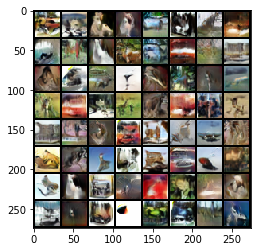

In [5]:
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np

img_list = []
noise = torch.randn(64,128).cuda()
fake_ims = g(noise).detach().cpu()
img_list.append(vutils.make_grid(fake_ims, padding=2, normalize=True))
plt.imshow(np.transpose(img_list[0], (1,2,0)))
plt.show()

In [1]:
from train_sngan_aw import *

g_aw, d_aw = train_sngan_aw(batch_size=64, lr=0.0002, cuda=True, num_epoch=81, num_disc_updates=3)

Files already downloaded and verified


Using cache found in /home/bugra/.cache/torch/hub/pytorch_vision_v0.8.0
/home/bugra/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/home/bugra/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 0 Iter 0 Loss disc 0.37 Loss gen -0.11
Epoch 0 Iter 50 Loss disc 0.20 Loss gen 1.27
Epoch 0 Iter 100 Loss disc 0.20 Loss gen -0.22
Epoch 0 Iter 150 Loss disc 0.09 Loss gen -1.93
Epoch 0 Iter 200 Loss disc 0.26 Loss gen -0.12
Epoch 0 Iter 250 Loss disc 0.21 Loss gen 0.79
Epoch 0 Iter 300 Loss disc 0.14 Loss gen 0.76
Epoch 0 Iter 350 Loss disc 0.17 Loss gen 0.32
Epoch 0 Iter 400 Loss disc 0.21 Loss gen 3.04
Epoch 0 Iter 450 Loss disc 0.05 Loss gen 0.95
Epoch 0 Iter 500 Loss disc 0.16 Loss gen 0.83
Epoch 0 Iter 550 Loss disc 0.10 Loss gen 2.26
Epoch 0 Iter 600 Loss disc 0.16 Loss gen -0.38
Epoch 0 Iter 650 Loss disc 0.21 Loss gen 0.28
Epoch 0 Iter 700 Loss disc 0.15 Loss gen 0.88
Epoch 0 Iter 750 Loss disc 0.11 Loss gen 0.54
Epoch 0 FID 274.50


/home/bugra/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/home/bugra/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 1 Iter 0 Loss disc 0.14 Loss gen 0.63
Epoch 1 Iter 50 Loss disc 0.14 Loss gen -0.24
Epoch 1 Iter 100 Loss disc 0.14 Loss gen 1.23
Epoch 1 Iter 150 Loss disc 0.21 Loss gen 0.12
Epoch 1 Iter 200 Loss disc 0.23 Loss gen 0.70
Epoch 1 Iter 250 Loss disc 0.15 Loss gen 0.58
Epoch 1 Iter 300 Loss disc 0.15 Loss gen 0.08
Epoch 1 Iter 350 Loss disc 0.27 Loss gen -0.53
Epoch 1 Iter 400 Loss disc 0.18 Loss gen 0.75
Epoch 1 Iter 450 Loss disc 0.11 Loss gen 1.06
Epoch 1 Iter 500 Loss disc 0.12 Loss gen 0.20
Epoch 1 Iter 550 Loss disc 0.12 Loss gen 0.42
Epoch 1 Iter 600 Loss disc 0.11 Loss gen 1.78
Epoch 1 Iter 650 Loss disc 0.20 Loss gen 0.65
Epoch 1 Iter 700 Loss disc 0.23 Loss gen 0.68
Epoch 1 Iter 750 Loss disc 0.08 Loss gen 2.23
Epoch 2 Iter 0 Loss disc 0.14 Loss gen 2.29
Epoch 2 Iter 50 Loss disc 0.11 Loss gen 1.87
Epoch 2 Iter 100 Loss disc 0.17 Loss gen 0.27
Epoch 2 Iter 150 Loss disc 0.12 Loss gen 0.76
Epoch 2 Iter 200 Loss disc 0.17 Loss gen 0.53
Epoch 2 Iter 250 Loss disc 0.13 Loss g

Epoch 12 Iter 50 Loss disc 0.13 Loss gen 0.01
Epoch 12 Iter 100 Loss disc 0.13 Loss gen 0.28
Epoch 12 Iter 150 Loss disc 0.15 Loss gen 0.40
Epoch 12 Iter 200 Loss disc 0.15 Loss gen 0.24
Epoch 12 Iter 250 Loss disc 0.22 Loss gen 0.80
Epoch 12 Iter 300 Loss disc 0.12 Loss gen 0.72
Epoch 12 Iter 350 Loss disc 0.13 Loss gen 0.20
Epoch 12 Iter 400 Loss disc 0.15 Loss gen -0.53
Epoch 12 Iter 450 Loss disc 0.11 Loss gen 0.89
Epoch 12 Iter 500 Loss disc 0.17 Loss gen -0.69
Epoch 12 Iter 550 Loss disc 0.20 Loss gen 0.26
Epoch 12 Iter 600 Loss disc 0.15 Loss gen 0.63
Epoch 12 Iter 650 Loss disc 0.11 Loss gen 0.16
Epoch 12 Iter 700 Loss disc 0.17 Loss gen 1.28
Epoch 12 Iter 750 Loss disc 0.21 Loss gen 0.37
Epoch 13 Iter 0 Loss disc 0.14 Loss gen 0.62
Epoch 13 Iter 50 Loss disc 0.32 Loss gen 0.27
Epoch 13 Iter 100 Loss disc 0.20 Loss gen 0.38
Epoch 13 Iter 150 Loss disc 0.13 Loss gen 0.30
Epoch 13 Iter 200 Loss disc 0.13 Loss gen 0.90
Epoch 13 Iter 250 Loss disc 0.15 Loss gen 0.31
Epoch 13 Iter 3

Epoch 22 Iter 750 Loss disc 0.14 Loss gen 0.12
Epoch 23 Iter 0 Loss disc 0.14 Loss gen 0.45
Epoch 23 Iter 50 Loss disc 0.13 Loss gen 0.09
Epoch 23 Iter 100 Loss disc 0.13 Loss gen -0.05
Epoch 23 Iter 150 Loss disc 0.13 Loss gen 0.11
Epoch 23 Iter 200 Loss disc 0.12 Loss gen 0.32
Epoch 23 Iter 250 Loss disc 0.16 Loss gen -0.07
Epoch 23 Iter 300 Loss disc 0.15 Loss gen -0.50
Epoch 23 Iter 350 Loss disc 0.14 Loss gen 0.38
Epoch 23 Iter 400 Loss disc 0.15 Loss gen 0.74
Epoch 23 Iter 450 Loss disc 0.14 Loss gen 0.19
Epoch 23 Iter 500 Loss disc 0.14 Loss gen 0.61
Epoch 23 Iter 550 Loss disc 0.15 Loss gen 0.47
Epoch 23 Iter 600 Loss disc 0.16 Loss gen 0.16
Epoch 23 Iter 650 Loss disc 0.14 Loss gen 0.59
Epoch 23 Iter 700 Loss disc 0.15 Loss gen 0.32
Epoch 23 Iter 750 Loss disc 0.12 Loss gen 0.91
Epoch 24 Iter 0 Loss disc 0.19 Loss gen -0.27
Epoch 24 Iter 50 Loss disc 0.17 Loss gen 0.50
Epoch 24 Iter 100 Loss disc 0.18 Loss gen 0.30
Epoch 24 Iter 150 Loss disc 0.16 Loss gen 0.16
Epoch 24 Iter 2

Epoch 33 Iter 650 Loss disc 0.16 Loss gen -0.02
Epoch 33 Iter 700 Loss disc 0.13 Loss gen 0.10
Epoch 33 Iter 750 Loss disc 0.13 Loss gen 0.25
Epoch 34 Iter 0 Loss disc 0.16 Loss gen 0.31
Epoch 34 Iter 50 Loss disc 0.14 Loss gen 0.36
Epoch 34 Iter 100 Loss disc 0.16 Loss gen 0.17
Epoch 34 Iter 150 Loss disc 0.15 Loss gen -0.17
Epoch 34 Iter 200 Loss disc 0.14 Loss gen 0.54
Epoch 34 Iter 250 Loss disc 0.15 Loss gen 0.36
Epoch 34 Iter 300 Loss disc 0.14 Loss gen -0.01
Epoch 34 Iter 350 Loss disc 0.15 Loss gen 0.82
Epoch 34 Iter 400 Loss disc 0.20 Loss gen 0.26
Epoch 34 Iter 450 Loss disc 0.16 Loss gen 0.37
Epoch 34 Iter 500 Loss disc 0.16 Loss gen 0.26
Epoch 34 Iter 550 Loss disc 0.16 Loss gen 0.34
Epoch 34 Iter 600 Loss disc 0.15 Loss gen 0.05
Epoch 34 Iter 650 Loss disc 0.17 Loss gen 0.27
Epoch 34 Iter 700 Loss disc 0.17 Loss gen 0.51
Epoch 34 Iter 750 Loss disc 0.16 Loss gen 0.20
Epoch 35 Iter 0 Loss disc 0.20 Loss gen -0.28
Epoch 35 Iter 50 Loss disc 0.12 Loss gen 0.81
Epoch 35 Iter 1

Epoch 44 Iter 550 Loss disc 0.12 Loss gen 0.28
Epoch 44 Iter 600 Loss disc 0.14 Loss gen -0.10
Epoch 44 Iter 650 Loss disc 0.14 Loss gen -0.10
Epoch 44 Iter 700 Loss disc 0.15 Loss gen 0.48
Epoch 44 Iter 750 Loss disc 0.14 Loss gen 0.20
Epoch 45 Iter 0 Loss disc 0.13 Loss gen -0.00
Epoch 45 Iter 50 Loss disc 0.16 Loss gen 0.32
Epoch 45 Iter 100 Loss disc 0.19 Loss gen -0.09
Epoch 45 Iter 150 Loss disc 0.14 Loss gen 0.19
Epoch 45 Iter 200 Loss disc 0.14 Loss gen 0.09
Epoch 45 Iter 250 Loss disc 0.15 Loss gen 0.26
Epoch 45 Iter 300 Loss disc 0.14 Loss gen 0.61
Epoch 45 Iter 350 Loss disc 0.17 Loss gen 0.40
Epoch 45 Iter 400 Loss disc 0.14 Loss gen 0.08
Epoch 45 Iter 450 Loss disc 0.14 Loss gen -0.26
Epoch 45 Iter 500 Loss disc 0.16 Loss gen 0.39
Epoch 45 Iter 550 Loss disc 0.15 Loss gen 0.32
Epoch 45 Iter 600 Loss disc 0.12 Loss gen 0.34
Epoch 45 Iter 650 Loss disc 0.16 Loss gen -0.07
Epoch 45 Iter 700 Loss disc 0.15 Loss gen 0.70
Epoch 45 Iter 750 Loss disc 0.15 Loss gen 0.11
Epoch 45 F

Epoch 55 Iter 450 Loss disc 0.16 Loss gen 0.19
Epoch 55 Iter 500 Loss disc 0.13 Loss gen 0.71
Epoch 55 Iter 550 Loss disc 0.15 Loss gen 0.35
Epoch 55 Iter 600 Loss disc 0.12 Loss gen 1.20
Epoch 55 Iter 650 Loss disc 0.14 Loss gen -0.31
Epoch 55 Iter 700 Loss disc 0.16 Loss gen -0.02
Epoch 55 Iter 750 Loss disc 0.13 Loss gen 0.19
Epoch 55 FID 42.18
Epoch 56 Iter 0 Loss disc 0.15 Loss gen 0.20
Epoch 56 Iter 50 Loss disc 0.15 Loss gen 0.53
Epoch 56 Iter 100 Loss disc 0.12 Loss gen 0.13
Epoch 56 Iter 150 Loss disc 0.14 Loss gen 0.20
Epoch 56 Iter 200 Loss disc 0.15 Loss gen 0.46
Epoch 56 Iter 250 Loss disc 0.15 Loss gen 0.58
Epoch 56 Iter 300 Loss disc 0.14 Loss gen 0.05
Epoch 56 Iter 350 Loss disc 0.16 Loss gen 0.25
Epoch 56 Iter 400 Loss disc 0.16 Loss gen -0.44
Epoch 56 Iter 450 Loss disc 0.14 Loss gen 0.71
Epoch 56 Iter 500 Loss disc 0.13 Loss gen 0.08
Epoch 56 Iter 550 Loss disc 0.18 Loss gen 1.12
Epoch 56 Iter 600 Loss disc 0.14 Loss gen 0.34
Epoch 56 Iter 650 Loss disc 0.12 Loss gen

Epoch 66 Iter 350 Loss disc 0.15 Loss gen -0.01
Epoch 66 Iter 400 Loss disc 0.15 Loss gen -0.38
Epoch 66 Iter 450 Loss disc 0.14 Loss gen 1.19
Epoch 66 Iter 500 Loss disc 0.13 Loss gen 0.02
Epoch 66 Iter 550 Loss disc 0.14 Loss gen -0.22
Epoch 66 Iter 600 Loss disc 0.16 Loss gen 0.18
Epoch 66 Iter 650 Loss disc 0.14 Loss gen 0.36
Epoch 66 Iter 700 Loss disc 0.13 Loss gen -0.07
Epoch 66 Iter 750 Loss disc 0.13 Loss gen 0.07
Epoch 67 Iter 0 Loss disc 0.14 Loss gen 0.45
Epoch 67 Iter 50 Loss disc 0.12 Loss gen 0.47
Epoch 67 Iter 100 Loss disc 0.16 Loss gen -0.12
Epoch 67 Iter 150 Loss disc 0.16 Loss gen -0.03
Epoch 67 Iter 200 Loss disc 0.15 Loss gen 0.41
Epoch 67 Iter 250 Loss disc 0.16 Loss gen 0.91
Epoch 67 Iter 300 Loss disc 0.13 Loss gen 0.33
Epoch 67 Iter 350 Loss disc 0.37 Loss gen 0.24
Epoch 67 Iter 400 Loss disc 0.14 Loss gen 0.06
Epoch 67 Iter 450 Loss disc 0.14 Loss gen 0.03
Epoch 67 Iter 500 Loss disc 0.13 Loss gen 0.57
Epoch 67 Iter 550 Loss disc 0.15 Loss gen 0.29
Epoch 67 I

Epoch 77 Iter 250 Loss disc 0.13 Loss gen 0.43
Epoch 77 Iter 300 Loss disc 0.17 Loss gen 0.66
Epoch 77 Iter 350 Loss disc 0.14 Loss gen -0.17
Epoch 77 Iter 400 Loss disc 0.15 Loss gen 0.29
Epoch 77 Iter 450 Loss disc 0.12 Loss gen 0.53
Epoch 77 Iter 500 Loss disc 0.13 Loss gen 0.67
Epoch 77 Iter 550 Loss disc 0.14 Loss gen 0.24
Epoch 77 Iter 600 Loss disc 0.15 Loss gen 0.08
Epoch 77 Iter 650 Loss disc 0.13 Loss gen -0.01
Epoch 77 Iter 700 Loss disc 0.15 Loss gen 0.46
Epoch 77 Iter 750 Loss disc 0.15 Loss gen 0.35
Epoch 78 Iter 0 Loss disc 0.14 Loss gen 0.03
Epoch 78 Iter 50 Loss disc 0.14 Loss gen 0.32
Epoch 78 Iter 100 Loss disc 0.14 Loss gen -0.17
Epoch 78 Iter 150 Loss disc 0.13 Loss gen 0.11
Epoch 78 Iter 200 Loss disc 0.15 Loss gen 0.39
Epoch 78 Iter 250 Loss disc 0.14 Loss gen 0.34
Epoch 78 Iter 300 Loss disc 0.14 Loss gen 0.45
Epoch 78 Iter 350 Loss disc 0.15 Loss gen 0.48
Epoch 78 Iter 400 Loss disc 0.15 Loss gen 0.23
Epoch 78 Iter 450 Loss disc 0.16 Loss gen -0.38
Epoch 78 Ite

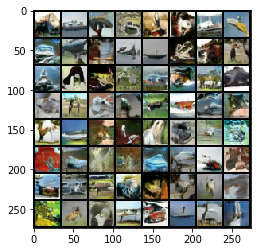

In [3]:
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np

img_list = []
noise = torch.randn(64,128).cuda()
fake_ims = g_aw(noise).detach().cpu()
img_list.append(vutils.make_grid(fake_ims, padding=2, normalize=True))
plt.imshow(np.transpose(img_list[0], (1,2,0)))
plt.show()

### Comparison of Qualitative Results

Below you can find Adaptive weighted AUTOGAN images from paper. Although these are not directly comparable since I report aw-SNGAN results but still gives some idea about how the best looking images should look like and reported FID of aw-SNGAN and aw-AUTOGAN is not too different (12.32 vs 11.82).

![aw-AUTOGAN CIFAR-10 Images](autogan.png)